# Product Clustering Using K-Means Algorithm 

### Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
%time data = pd.read_csv("./Hackathon_Ideal_Data.csv", delimiter=',', index_col=0)

Wall time: 483 ms


In [3]:
data.sample(5)

,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
MONTH,,,,,,,,,
M3,P10,2,62,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,GOOD DAY,GOOD DAY WONDERFULLS
M3,P8,3,180,"FRAGRANCE-PERFUM,DEO & COLOGNE",FRAGRANCE - PERFUME,FRAGRANCE - PERFUME,EMAMI,HE,HE
M3,P4,0,0,TOILET SOAPS (04/00),PREMIUM,PREMIUM,HINDUSTAN UNILEVER LIMITED,LUX,LUX INTL
M1,P5,13,447,PRE-POST WASH PRODUCTS,LIQUID BLEACHES,LIQUID BLEACHES,HINDUSTAN UNILEVER LIMITED,RIN,RIN
M2,P7,0,0,LIQUID TOILET SOAPS (8/93),HAND WASH,HAND WASH,HINDUSTAN UNILEVER LIMITED,LIFEBUOY,LIFEBUOY TOTAL 10


In [4]:
data.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent


In [6]:
total

BRD          0
MBRD         0
CMP          0
SSGRP        0
SGRP         0
GRP          0
VALUE        0
QTY          0
STORECODE    0
dtype: int64

In [7]:
missing_data

,Total,Missing Percent
BRD,0,0.0
MBRD,0,0.0
CMP,0,0.0
SSGRP,0,0.0
SGRP,0,0.0
GRP,0,0.0
VALUE,0,0.0
QTY,0,0.0
STORECODE,0,0.0


Dari hasil di atas dapat kita ketahui bahwa tidak ada missing data pada dataset tersebut.

In [8]:
import pandas_profiling

In [9]:
import pandas_profiling

data_fifa = pd.read_csv('./Hackathon_Ideal_Data.csv')
profile = data_fifa.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling.html")

#### Seaborn

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [11]:
import seaborn as sns

In [12]:
data = pd.read_csv("./Hackathon_Ideal_Data.csv")

In [13]:
data.shape

(14260, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


#### Menganalisis Variabel Secara Individual

In [15]:
numerical_vars = ['QTY', 'VALUE']
categorical_vars = ['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']

In [16]:
data = data[numerical_vars+categorical_vars]

In [17]:
data.shape

(14260, 10)

#### Memahami Variabel Utama

In [19]:
data['QTY'].describe()

count    14260.000000
mean        16.354488
std         34.365583
min          0.000000
25%          1.000000
50%          4.000000
75%         16.000000
max        641.000000
Name: QTY, dtype: float64

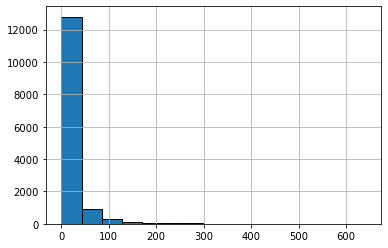

In [20]:
data['QTY'].hist(edgecolor = 'black', bins=15);

In [21]:
print("Skewness: {:0.3f}".format(data['QTY'].skew()))
print("Kurtosis: {:0.3f}".format(data['QTY'].kurt()))

Skewness: 5.538
Kurtosis: 51.735


#### Variabel Numerikal

In [22]:
data[numerical_vars].describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


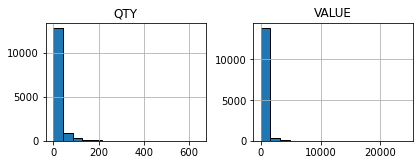

In [24]:
data[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

#### Variabel Kategorikal

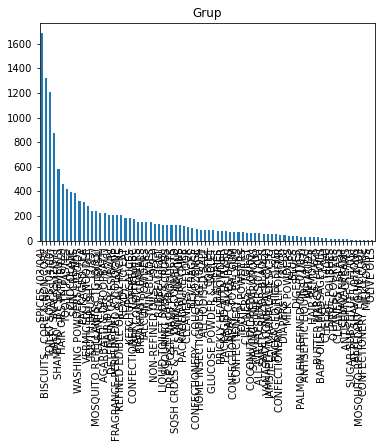

In [25]:
data['GRP'].value_counts().plot(kind='bar', title='Grup');

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


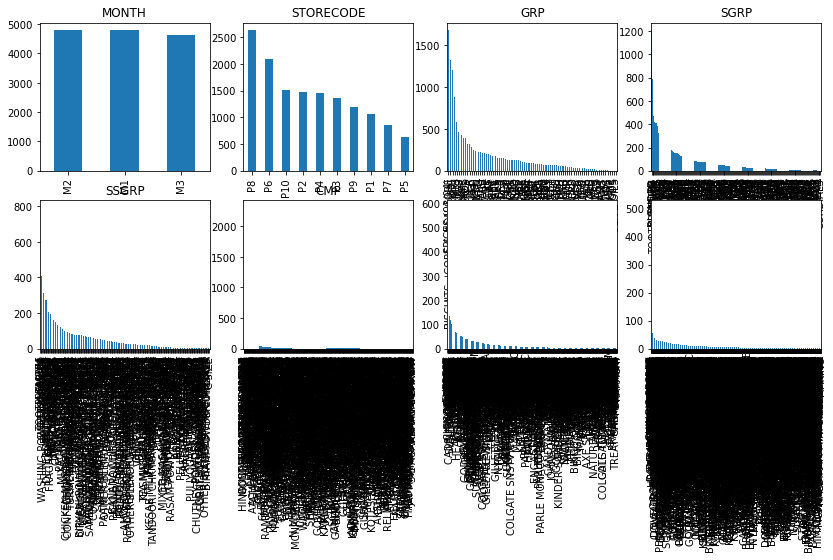

In [27]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    data[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [28]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [29]:
levels_to_keep = data[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

MONTH                                             [M2, M1, M3]
STORECODE            [P8, P6, P10, P2, P4, P3, P9, P1, P7, P5]
GRP          [SPICES (03/04), BISCUITS - CORE & NON CORE, T...
SGRP         [BLENDED, PREMIUM, PURE, TOOTH PASTES, CREAM, ...
SSGRP        [PREMIUM, TOOTH PASTES, CREAM, SWEET/COOKIES, ...
CMP          [HINDUSTAN UNILEVER LIMITED, GODREJ CONSUMER P...
MBRD         [EVEREST, DOVE, HALDIRAM, LIFEBUOY, LUX, BALAJ...
BRD          [EVEREST, CHING'S SECRET, BADSHAH, SUHANA, RAM...
dtype: object

In [30]:
for var in categorical_vars:
    data = data.loc[data[var].isin(levels_to_keep[var])]

In [31]:
data.shape

(2917, 10)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


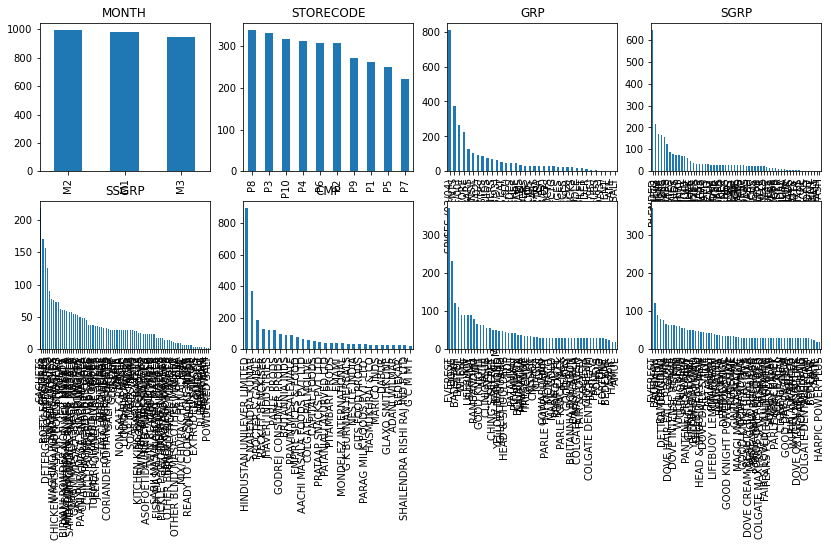

In [32]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    data[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

#### Hubungan Antara Variabel dengan Scatter Plot

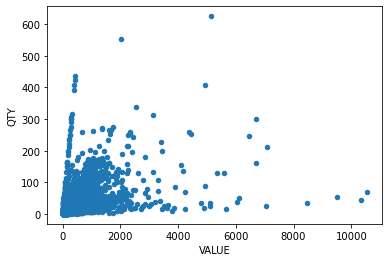

In [33]:
data.plot.scatter(x='VALUE', y='QTY');

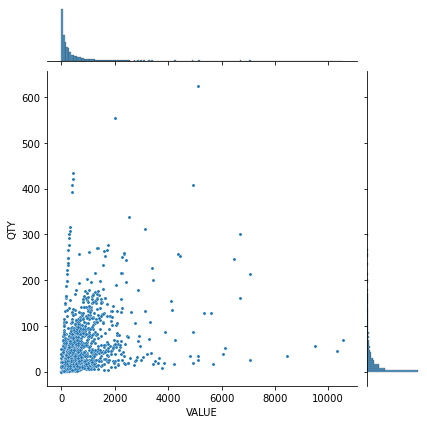

In [34]:
sns.jointplot(x='VALUE', y='QTY', data=data, joint_kws={"s": 10});

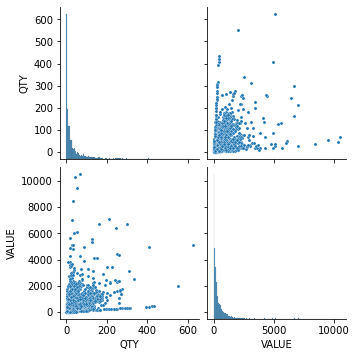

In [35]:
sns.pairplot(data[numerical_vars[:4]], plot_kws={"s": 10});

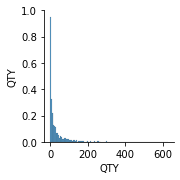

In [36]:
sns.pairplot(data[['QTY']+numerical_vars[4:]], plot_kws={"s": 10});

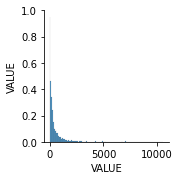

In [39]:
sns.pairplot(data[['VALUE']+numerical_vars[4:]], plot_kws={"s": 10});

In [40]:
data[numerical_vars].corr()

,QTY,VALUE
QTY,1.000000,0.443077
VALUE,0.443077,1.000000


In [41]:
data[numerical_vars].corr()['QTY'].sort_values(ascending=False)

QTY      1.000000
VALUE    0.443077
Name: QTY, dtype: float64

In [42]:
data[numerical_vars].corr()['VALUE'].sort_values(ascending=False)

VALUE    1.000000
QTY      0.443077
Name: VALUE, dtype: float64

In [43]:
correlations = data[numerical_vars].corr()

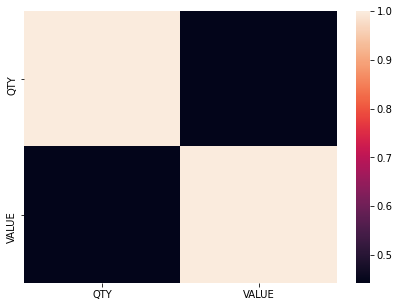

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

#### Hubungan Antara Variabel dengan Box Plot

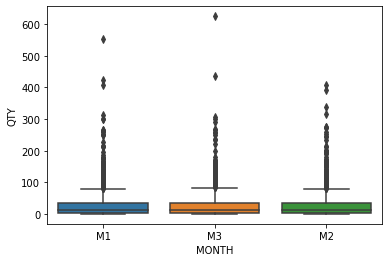

In [47]:
sns.boxplot(x='MONTH', y='QTY', data=data);

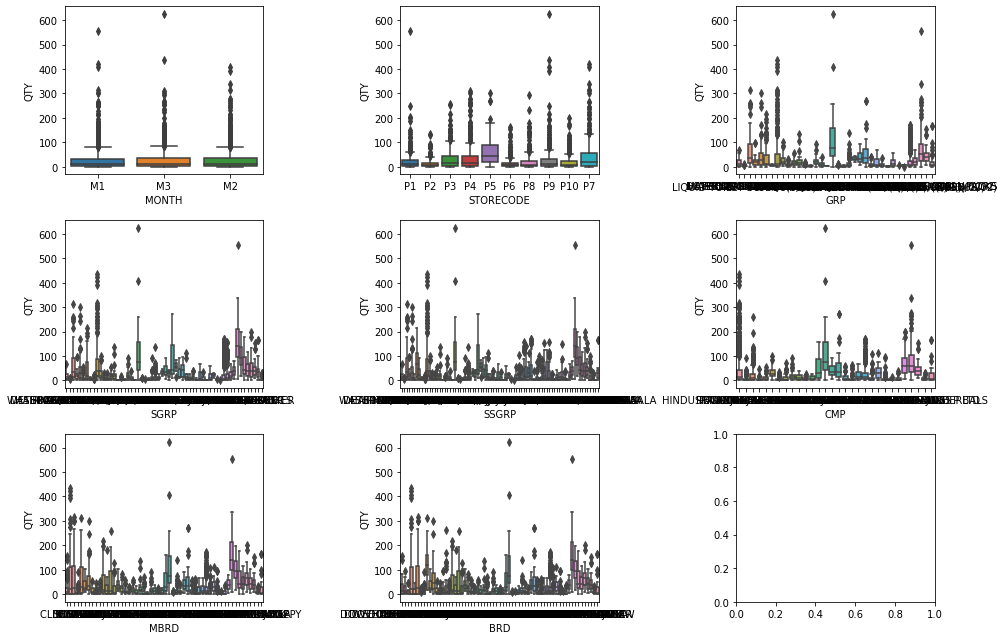

In [48]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='QTY', data=data, ax=subplot)
    
fig.tight_layout()

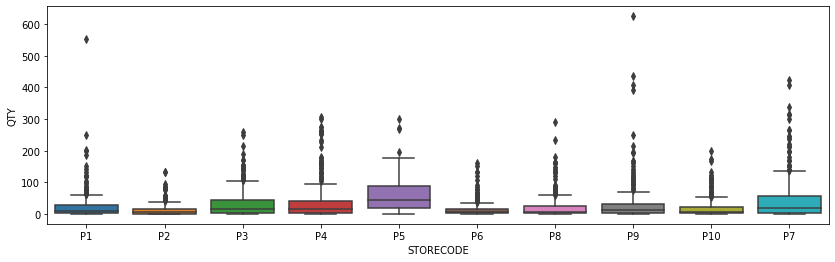

In [49]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='STORECODE', y='QTY', data=data, ax=ax);

In [50]:
sorted_nb = data.groupby('STORECODE')['QTY'].median().sort_values().index.values

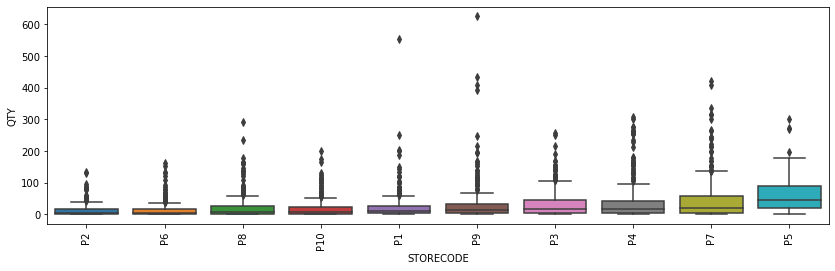

In [51]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='STORECODE', y='QTY', data=data, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

#### Hubungan Antara Variabel dengan Complex Conditional Plots

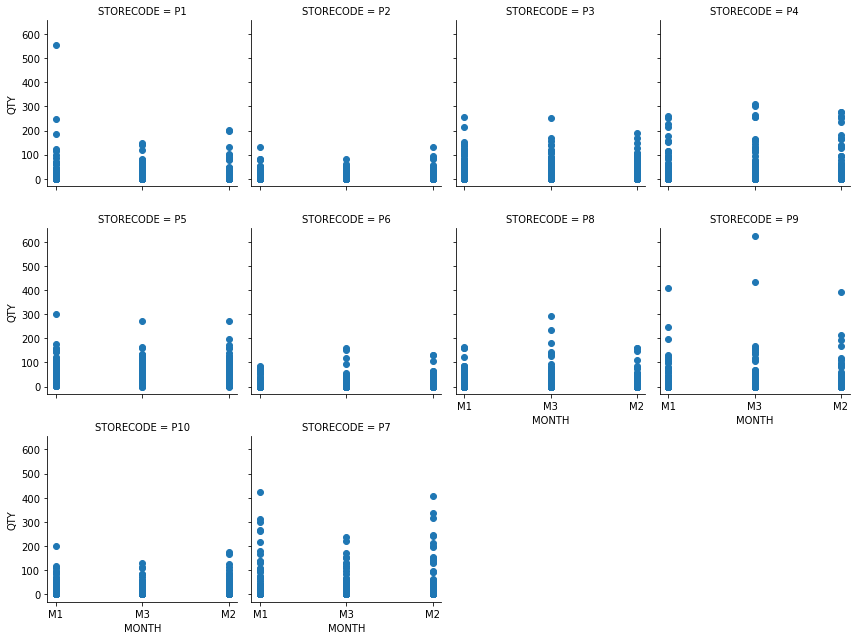

In [52]:
conditional_plot = sns.FacetGrid(data, col="STORECODE", col_wrap=4)
conditional_plot.map(plt.scatter, "MONTH", "QTY");

### Data Preparasi

#### Data Cleaning

In [53]:
data = pd.read_csv("./Hackathon_Ideal_Data.csv")

In [54]:
data.drop(["MONTH", "STORECODE", "GRP", "SGRP", "SSGRP","CMP", "MBRD" ], axis = 1, inplace=True)

In [55]:
data.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   QTY     14260 non-null  int64 
 1   VALUE   14260 non-null  int64 
 2   BRD     14260 non-null  object
dtypes: int64(2), object(1)
memory usage: 334.3+ KB


In [57]:
data.head()

,QTY,VALUE,BRD
0,25,83,DOVE HAIR FALL RESCUE
1,6,22,DOVE INTENSE REPAIR
2,4,15,DOVE OXYGEN MOISTURE
3,15,60,FRUCTIS
4,0,0,CLINIC PLUS


In [59]:
stld_data = data[["QTY","VALUE"]]

In [61]:
#statistic of the data
stld_data.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


### Clustering using KMeans

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [63]:
#statistic of the data
stld_data.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [65]:
#standadizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(stld_data)

In [66]:
#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.426000e+04,1.426000e+04
mean,-4.157158e-15,-2.151388e-15
std,1.000035e+00,1.000035e+00
min,-4.759140e-01,-3.873888e-01
25%,-4.468141e-01,-3.742327e-01
50%,-3.595144e-01,-2.571432e-01
75%,-1.031557e-02,-1.507076e-02
max,1.817712e+01,3.143067e+01


(-2.0, 20.0)

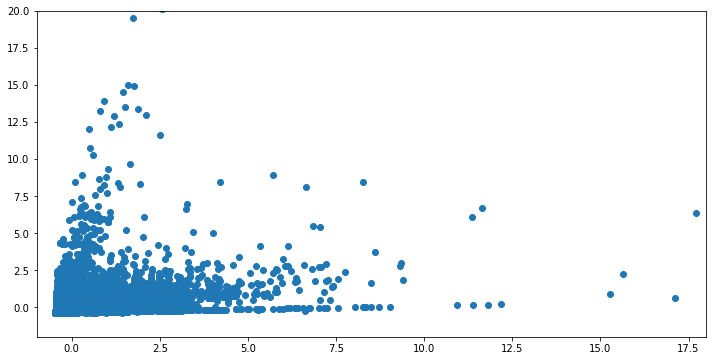

In [68]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-1,18)
plt.ylim(-2,20)

In [69]:
# defining the k means function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [70]:
# save new cluster for chart
y_km = kmeans.fit_predict(data_scaled)

In [71]:
# inertia on the fitted data
kmeans.inertia_

16985.764005478803

(-2.0, 20.0)

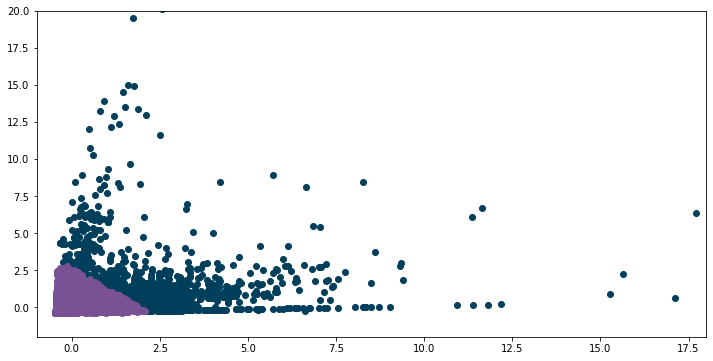

In [72]:
#create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')

plt.xlim(-1,18)
plt.ylim(-2,20)